In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"data\heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

ASY = asymptomatic

ATA: atypical angina

NAP : non-anginal pain

TA typical angina

In [6]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [7]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [8]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [9]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [10]:
df['Cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [11]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [12]:
df['MaxHR'].value_counts()

150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64

## Data Preprocessing

In [13]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


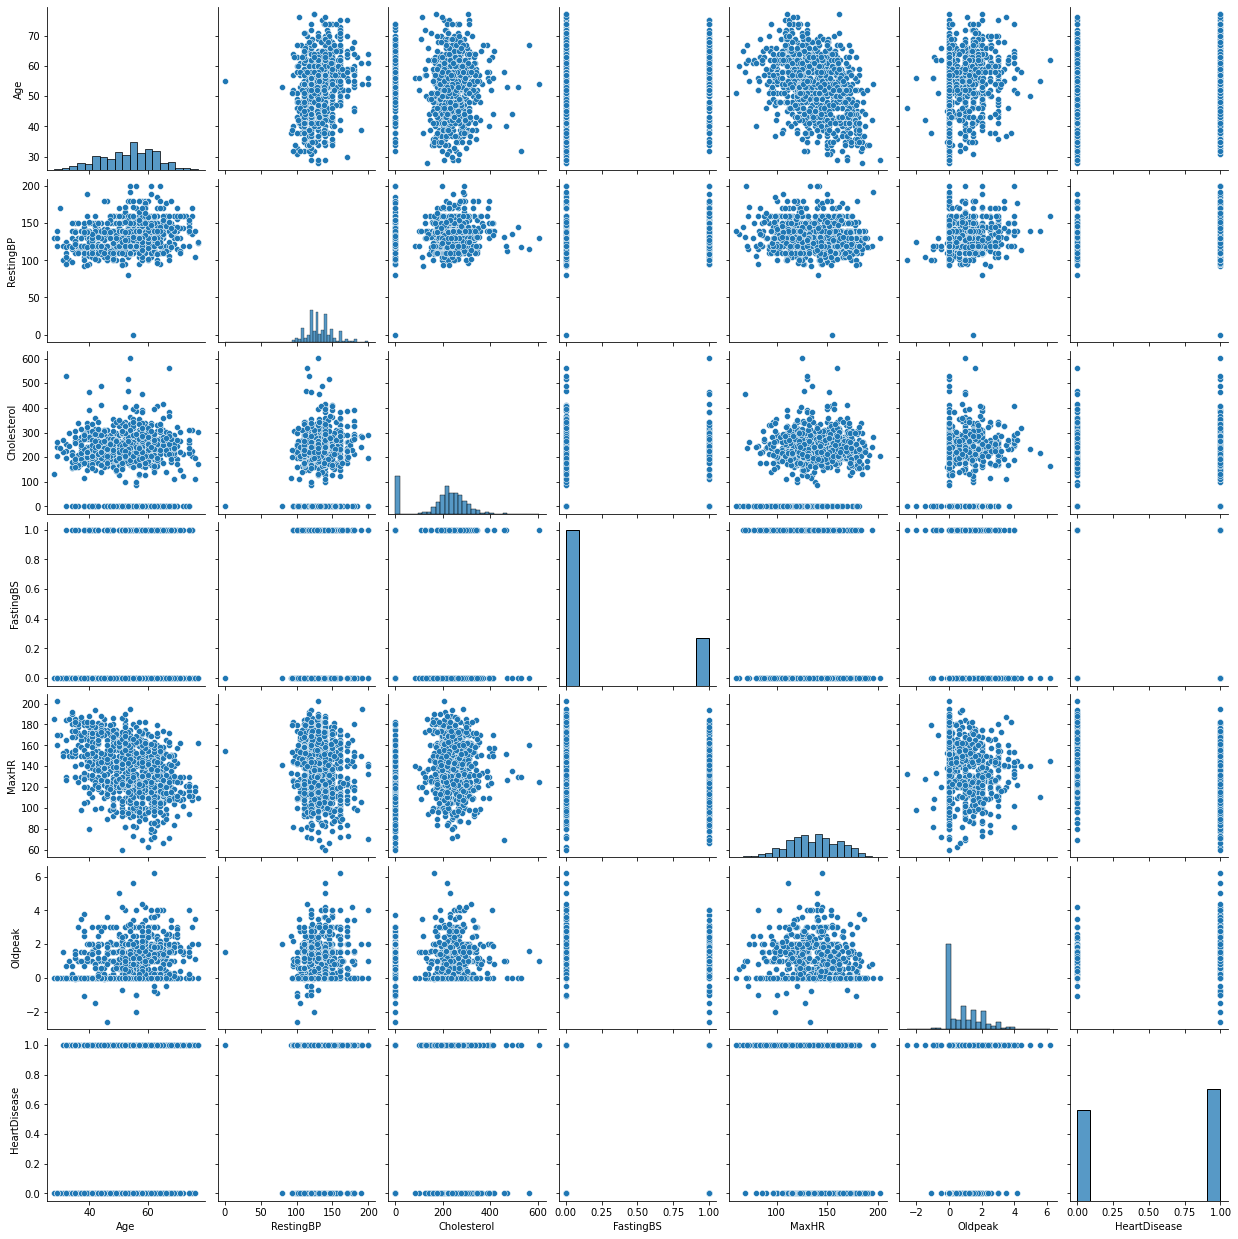

In [16]:
sns.pairplot(data=df)

In [17]:
def box_plot(df,var):
    sns.boxplot(x=df[var])
    plt.show()

Age


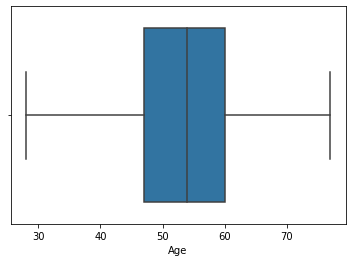

RestingBP


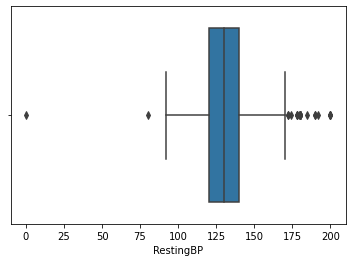

Cholesterol


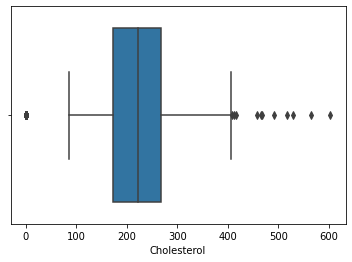

FastingBS


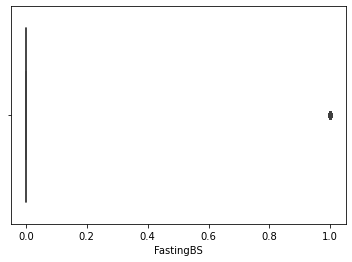

MaxHR


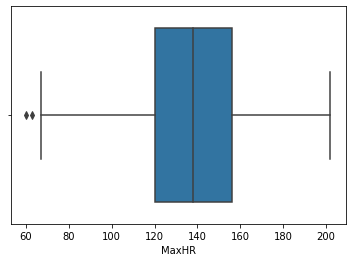

Oldpeak


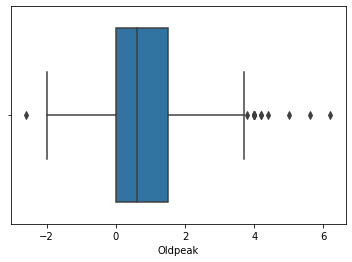

HeartDisease


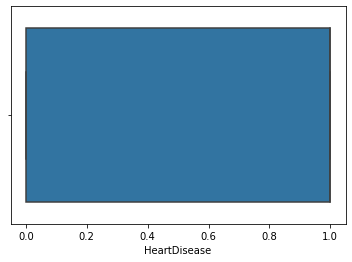

In [18]:
x=["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"]
for i in x:
    print(i)
    box_plot(df,i)

In [19]:
#RestingBP

out = df[df['RestingBP'] < 50]
out

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [20]:
df = df[~(df['RestingBP']<50)]

In [21]:
#Cholesterol
out = df[df['Cholesterol'] < 85]
out

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [22]:
df = df[~(df['Cholesterol'] < 85)]

In [23]:
#Oldpeak

out = df[df['Oldpeak']<0]
out

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
512,35,M,NAP,123,161,0,ST,153,N,-0.1,Up,0


In [24]:
df = df[~(df['Oldpeak']<0)] 

In [25]:
df.shape

(745, 12)

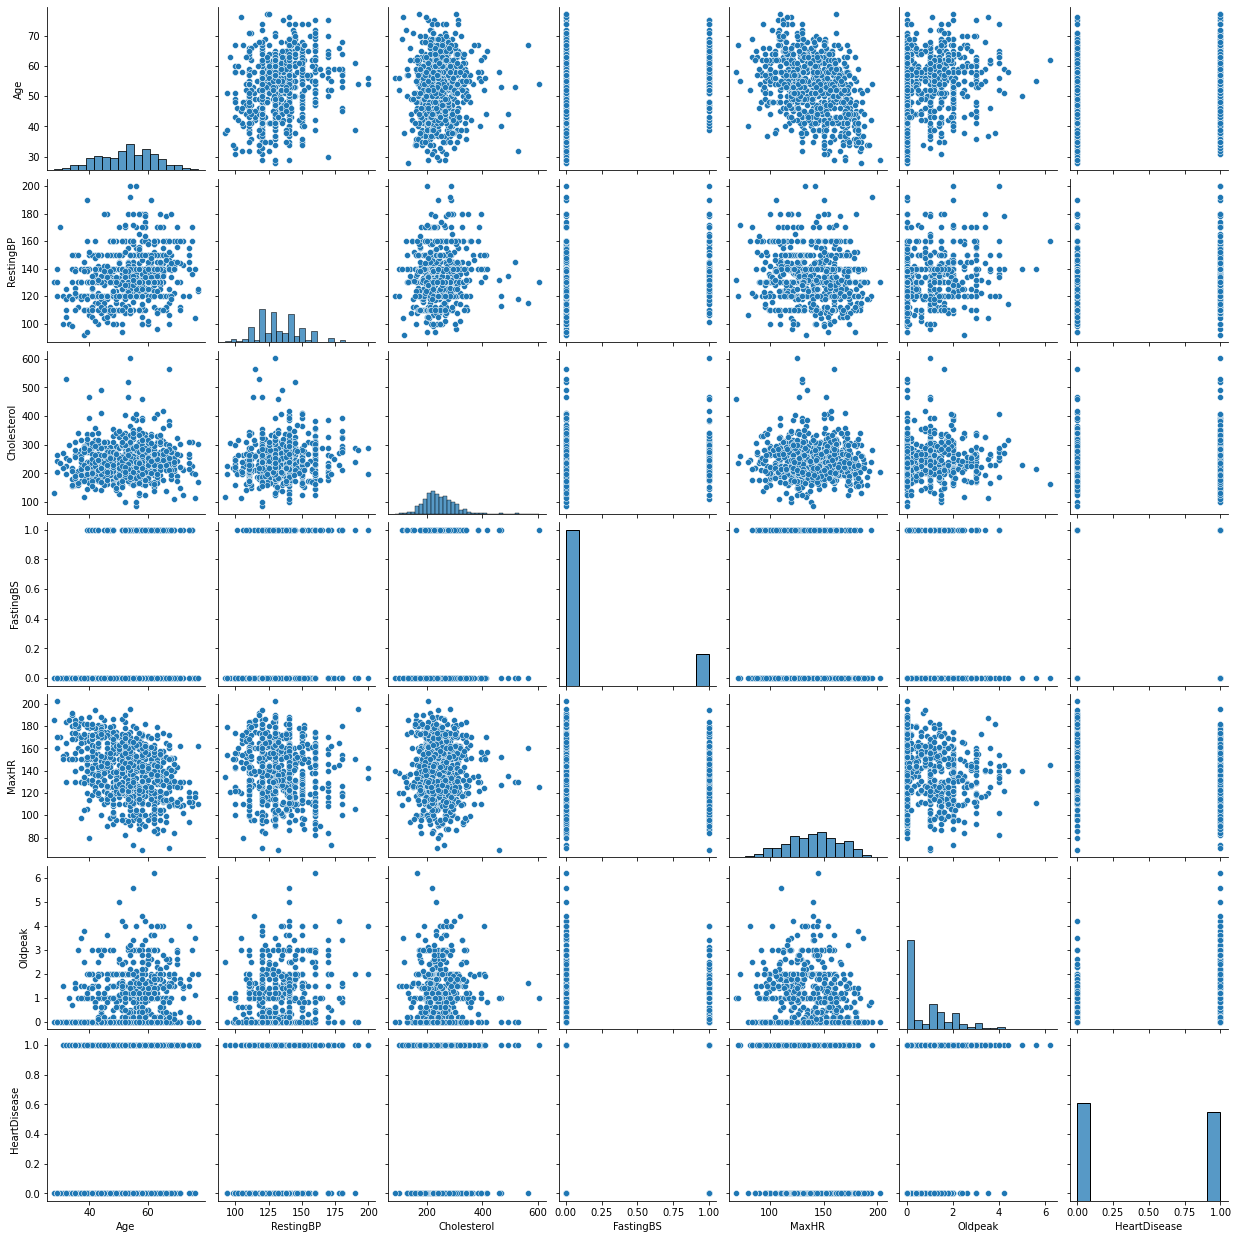

In [26]:
sns.pairplot(data=df)

In [27]:
df2 = pd.get_dummies(df)

In [28]:
df2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [29]:
df2.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.259074,0.055390,0.240810,-0.381774,0.284489,0.297092,-0.042462,0.042462,0.184792,...,-0.017685,0.050183,0.178118,-0.242481,0.116148,-0.244595,0.244595,0.148723,0.200746,-0.270451
RestingBP,0.259074,1.000000,0.094986,0.173478,-0.125419,0.198008,0.172642,-0.034821,0.034821,0.078399,...,-0.052994,0.064898,0.022791,-0.087138,0.088743,-0.160523,0.160523,0.096748,0.081073,-0.126371
Cholesterol,0.055390,0.094986,1.000000,0.053239,-0.018895,0.056824,0.102251,0.106132,-0.106132,0.091770,...,-0.065168,-0.050781,0.078656,-0.049374,-0.024688,-0.085417,0.085417,-0.011219,0.102391,-0.097242
FastingBS,0.240810,0.173478,0.053239,1.000000,-0.102428,0.055045,0.160138,-0.096451,0.096451,0.049712,...,0.006980,0.049158,0.071625,-0.166001,0.136890,-0.109580,0.109580,0.089109,0.105048,-0.146799
MaxHR,-0.381774,-0.125419,-0.018895,-0.102428,1.000000,-0.259078,-0.376843,0.157462,-0.157462,-0.371110,...,0.151403,0.091320,0.095903,0.040052,-0.162103,0.395974,-0.395974,-0.077699,-0.345760,0.382402
Oldpeak,0.284489,0.198008,0.056824,0.055045,-0.259078,1.000000,0.495091,-0.126557,0.126557,0.345539,...,-0.133887,0.042702,0.095429,-0.132512,0.065651,-0.464966,0.464966,0.390105,0.369891,-0.552584
HeartDisease,0.297092,0.172642,0.102251,0.160138,-0.376843,0.495091,1.000000,-0.293751,0.293751,0.522375,...,-0.220417,-0.054110,0.068943,-0.135031,0.099171,-0.551390,0.551390,0.131962,0.591055,-0.653290
Sex_F,-0.042462,-0.034821,0.106132,-0.096451,0.157462,-0.126557,-0.293751,1.000000,-1.000000,-0.177380,...,0.081916,-0.013920,0.029448,0.001838,-0.036002,0.193305,-0.193305,-0.073739,-0.103097,0.137662
Sex_M,0.042462,0.034821,-0.106132,0.096451,-0.157462,0.126557,0.293751,-1.000000,1.000000,0.177380,...,-0.081916,0.013920,-0.029448,-0.001838,0.036002,-0.193305,0.193305,0.073739,0.103097,-0.137662
ChestPainType_ASY,0.184792,0.078399,0.091770,0.049712,-0.371110,0.345539,0.522375,-0.177380,0.177380,1.000000,...,-0.535984,-0.239713,0.054294,-0.109515,0.082281,-0.482493,0.482493,0.111022,0.345067,-0.397284


In [44]:
df2.to_csv("data//clean_heart_data.csv",index=False)

## Machine Learning Model

In [31]:
x = df2.drop('HeartDisease',axis=1)
y = df2['HeartDisease']
x.shape,y.shape

((745, 20), (745,))

In [45]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=0)

Feature Scalling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

q = sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [48]:
lgr.fit(x_train,y_train)
lgr.intercept_,lgr.coef_

(array([-0.27800591]),
 array([[ 0.20566061,  0.12535137,  0.11198595, -0.01417822, -0.13764479,
          0.35605537, -0.44427821,  0.44427821,  0.45253053, -0.21843189,
         -0.28508028, -0.06403749,  0.1120403 , -0.10061476,  0.00466934,
         -0.18927681,  0.18927681,  0.00068811,  0.65723029, -0.6594285 ]]))

In [49]:
lgr.coef_.shape

(1, 20)

In [50]:
x_test_pred = lgr.predict(x_test)

In [51]:
print(lgr.score(x_train,y_train))
print(lgr.score(x_test,y_test))

0.8675623800383877
0.8526785714285714


In [52]:
len(x_test_pred)

224

In [54]:
import joblib

joblib.dump(lgr,"heart_ml_model.pkl")

['heart_ml_model.pkl']

### Test Model

In [41]:
list(x.columns)

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [42]:
def pred(age,bp,cholestroel,fasting_bs,max_hr,oldpeak,sex,chest_pain,resting_ecg,angina,st_slope):
    
    arr = np.zeros(len(x.columns))
    
    arr[0] = age
    arr[1] = bp
    arr[2] = cholestroel
    arr[3] = fasting_bs
    arr[4] = max_hr
    arr[5] = oldpeak
    
    if "Sex_" + sex in x.columns:
        index = np.where(x.columns=="Sex_"+sex)
        arr[index]=1
        
    if "ChestPainType_" + chest_pain in x.columns:
        index = np.where(x.columns=="ChestPainType_"+chest_pain)
        arr[index]=1
        
    if "RestingECG_" + resting_ecg in x.columns:
        index = np.where(x.columns=="RestingECG_"+resting_ecg)
        arr[index]=1
    
    if "ExerciseAngina_" + angina:
        index = np.where(x.columns=="ExerciseAngina_"+angina)
        arr[index]=1
        
    if "ST_Slope_" + st_slope in x.columns:
        index = np.where(x.columns=="ST_Slope_"+st_slope)
        arr[index]=1
  
    arr = sc.transform([arr])
    coef = lgr.coef_
    coef = coef.reshape(20)
    s = sum(coef*arr[0])+ lgr.intercept_[0]
    print("Prob=",1/(1+2.718**(-1*s)))

In [57]:
pred(38,127,329,0,120,1,'M','TA','ST','N','Flat')

Prob= 0.6852648895235562
